In [1]:
from braket.circuits import Circuit, Gate
from braket.aws import AwsDevice
from matplotlib import pyplot as plt

In [2]:
# set up device
iqm = AwsDevice("arn:aws:braket:eu-north-1::device/qpu/iqm/Garnet")

In [3]:
# create a maximum entangled state.
bell = Circuit().h(0).cnot(0, 1)  

In [4]:
# run circuit 
iqm_task = iqm.run(bell, shots=1000)

In [5]:
# get measurement counts
iqm_results = iqm_task.result()
iqm_counts = iqm_results.measurement_counts
print('Measurement counts:', iqm_counts)

Measurement counts: Counter({'00': 491, '11': 470, '01': 25, '10': 14})


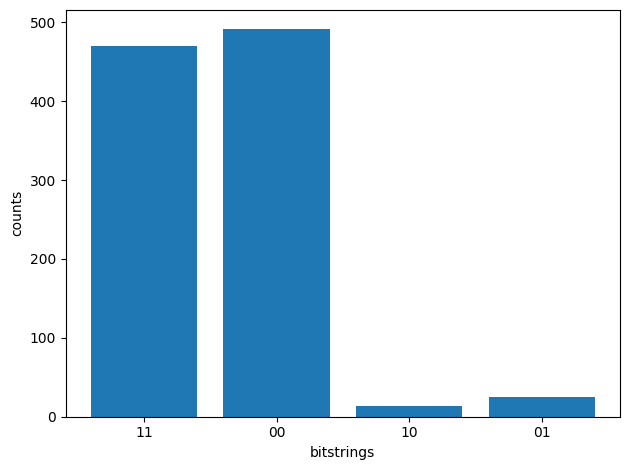

In [6]:
# plot results: see effects of noise
%matplotlib inline
plt.bar(iqm_counts.keys(), iqm_counts.values())
plt.xlabel('bitstrings')
plt.ylabel('counts')
plt.tight_layout()

In [7]:
# get id and status of submitted quantum task
iqm_task_id = iqm_task.id
iqm_status = iqm_task.state()
print('ID of quantum task:', iqm_task_id)
print('Status of quantum task:', iqm_status)

ID of quantum task: arn:aws:braket:eu-north-1:013288819788:quantum-task/300e9979-632e-4c83-861b-644f9a656773
Status of quantum task: COMPLETED
